In [1]:
import numpy as np
from osgeo import gdal
from datetime import datetime, timedelta
import calendar
import matplotlib.pyplot as plt

In [2]:
start = datetime.strptime("01-01-1981", "%d-%m-%Y")
end = datetime.strptime("31-12-2011", "%d-%m-%Y")
analysis_period_years = end.year - start.year + 1
date_generated = [start + timedelta(days=x) for x in range(0, (end-start).days + 1)]

In [3]:
reference_raster = gdal.Open("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/meteodata/calib/prec/P_CHIRPS.v2.0_mm-day-1_daily_1981.01.01_aligned.tif")
reference_raster_array = np.array(reference_raster.GetRasterBand(1).ReadAsArray())
raster_rows = len(reference_raster_array)
raster_columns = len(reference_raster_array[0])
reference_raster = None

In [4]:
db = np.load("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/DBs/prec_db.npy")
db_month_p85 = np.load("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/DBs/threshold_monthly_prec85.npy")
y_p85_leap_year = np.load("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/DBs/flattened_threshold_monthly_p85_leap_year.npy")
smooth_p85_leap_year = np.load("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/DBs/smoothed_threshold_monthly_p85_leap_year.npy")
y_p85_regular_year = np.load("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/DBs/flattened_threshold_monthly_p85_regular_year.npy")
smooth_p85_regular_year = np.load("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/DBs/smoothed_threshold_monthly_p85_regular_year.npy")

In [14]:
row = 80
column = 50
year = 2011
y_data = np.array([])

for month in range(12):
    days_of_month = calendar.monthrange(year, month + 1)[1]
    for day in range(days_of_month):
        y_data = np.append(y_data, db[row, column, year - start.year, month, day])

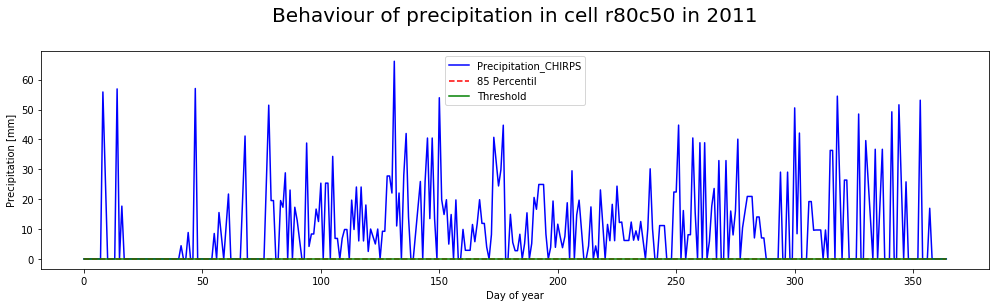

In [15]:
fig = plt.figure(figsize=(17,4))

if calendar.isleap(year):
    x = range(366)
    plt.plot(x, y_data, '-b', label='Precipitation_CHIRPS')
    plt.plot(x, y_p85_leap_year[row, column, :], '--r', label='85 Percentil')
    plt.plot(x, smooth_p85_leap_year[row, column, :], 'g', label='Threshold')
    title = "Behaviour of precipitation in cell r" + str(row) + "c" + str(column) + " in " + str(year) + " (leap)"
else:
    x = range(365)
    plt.plot(x, y_data, '-b', label='Precipitation_CHIRPS')
    plt.plot(x, y_p85_regular_year[row, column, :], '--r', label='85 Percentil')
    plt.plot(x, smooth_p85_regular_year[row, column, :], 'g', label='Threshold')
    title = "Behaviour of precipitation in cell r" + str(row) + "c" + str(column) + " in " + str(year)

leg = plt.legend();
xlabel = "Day of year"
ylabel = "Precipitation [mm]"
plt.title(title, pad=30, fontsize=20)
plt.xlabel(xlabel, fontdict=None, labelpad=None)
plt.ylabel(ylabel, fontdict=None, labelpad=None)
plt.show
dst_path = "/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/NCDA_CDA/Graphs/"
plt.savefig(dst_path + "Graph_analysis_" + str(year) + "_r" + str(row) + "_c" + str(column) + ".pdf", dpi=600, bbox_inches='tight')

In [16]:
drought_binary_db = np.load("/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/DBs/drought_binary_db.npy")

In [57]:
#drought_binary_db.(row, column, year, month, day)
np.where(drought_binary_db==0)

127293432

In [5]:
flat_p85_regular_year = np.empty((raster_rows, raster_columns, 365))
flat_p85_leap_year = np.empty((raster_rows, raster_columns, 366))

In [15]:
dst_path = "/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/meteodata/calib/prec/"
plt.savefig(dst_path + "Graph_analysis.pdf", dpi=600, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show>

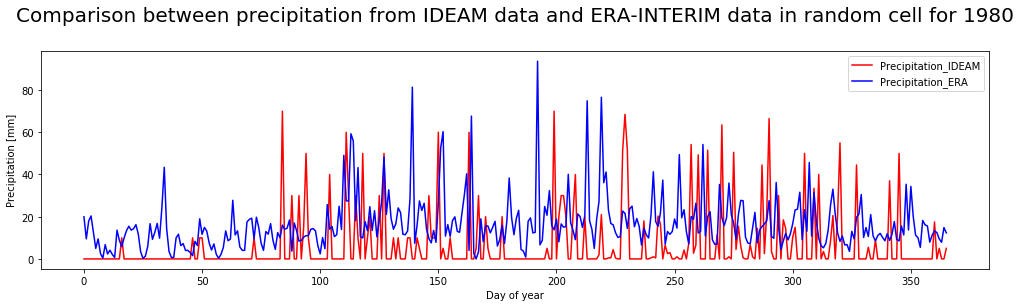

In [20]:
fig = plt.figure(figsize=(17,4))
plt.plot(x, daily_prec_1980, '-r', label='Precipitation_IDEAM')
plt.plot(x, y_data, '-b', label='Precipitation_ERA')
leg = plt.legend();
title = "Comparison between precipitation from IDEAM data and ERA-INTERIM data in random cell for 1980"
xlabel = "Day of year"
ylabel = "Precipitation [mm]"
plt.title(title, pad=30, fontsize=20)
plt.xlabel(xlabel, fontdict=None, labelpad=None)
plt.ylabel(ylabel, fontdict=None, labelpad=None)
plt.show

In [26]:
for month in range(12):
    days_of_month = calendar.monthrange(year, month + 1)[1]
    for day in range(days_of_month):
        y_data = np.append(y_data, db[row, column, year - start.year, month, day])

In [21]:
dst_path = "/Users/juanmanuel/Documents/Juan Manuel/Universidad/TESIS/Datos/meteodata/calib/prec/"
plt.savefig(dst_path + "Graph_analysis_1.pdf", dpi=600, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [27]:
y_p85_regular_year = flat_p85_regular_year[row, column, :]
y_p85_leap_year = flat_p85_leap_year[row, column, :]
smooth_p85_regular_year = savgol_filter(y_p85_regular_year, 45, 3) # window size 51, polynomial order 3
smooth_p85_leap_year = savgol_filter(y_p85_leap_year, 45, 3) # window size 51, polynomial order 3

In [22]:
np.corrcoef(daily_prec_1980, y_data)

array([[ 1.        ,  0.03475954],
       [ 0.03475954,  1.        ]])

<function matplotlib.pyplot.show>

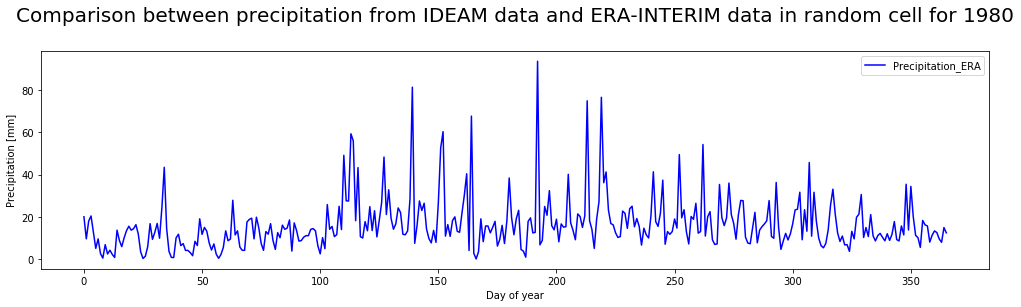

In [23]:
fig = plt.figure(figsize=(17,4))
plt.plot(x, y_data, '-b', label='Precipitation_ERA')
leg = plt.legend();
title = "Comparison between precipitation from IDEAM data and ERA-INTERIM data in random cell for 1980"
xlabel = "Day of year"
ylabel = "Precipitation [mm]"
plt.title(title, pad=30, fontsize=20)
plt.xlabel(xlabel, fontdict=None, labelpad=None)
plt.ylabel(ylabel, fontdict=None, labelpad=None)
plt.show

In [26]:
print daily_prec_1980[137], y_data[137]

 10.0 13.275015831
